# Lab 8 : Numerical Methods Practice

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)

# Part 1a : Using Runge-Kutta's Method (2 points)
## Recall the initial value problem from lectures 19-20 given by:
## $$x'' + 4x = 3 \sin(2t), \qquad x(0) = 2, \qquad x'(0) = -1$$
## with exact solution
## $$x(t) = 2 \cos (2t) - \frac{1}{8} \sin (2t) - \frac{3t}{4} \cos(2t)$$
## To apply numerical methods we convert to the first order system initial value problem 
## $$\mathbf{y}' = \begin{bmatrix} 0 & 1 \\ -4 & 0 \end{bmatrix}
\mathbf{y} + \begin{bmatrix} 0 \\ 3 \sin (2t) \end{bmatrix},
\qquad \mathbf{y}(0) = \begin{bmatrix} 2 \\ -1 \end{bmatrix}$$
## Use Runge Kutta's method (function given below) with n = 50 to plot an **approximate solution** where t goes from 0 to 10 on the same plot as the **exact solution**.
## See the screenshot below for the correct output.

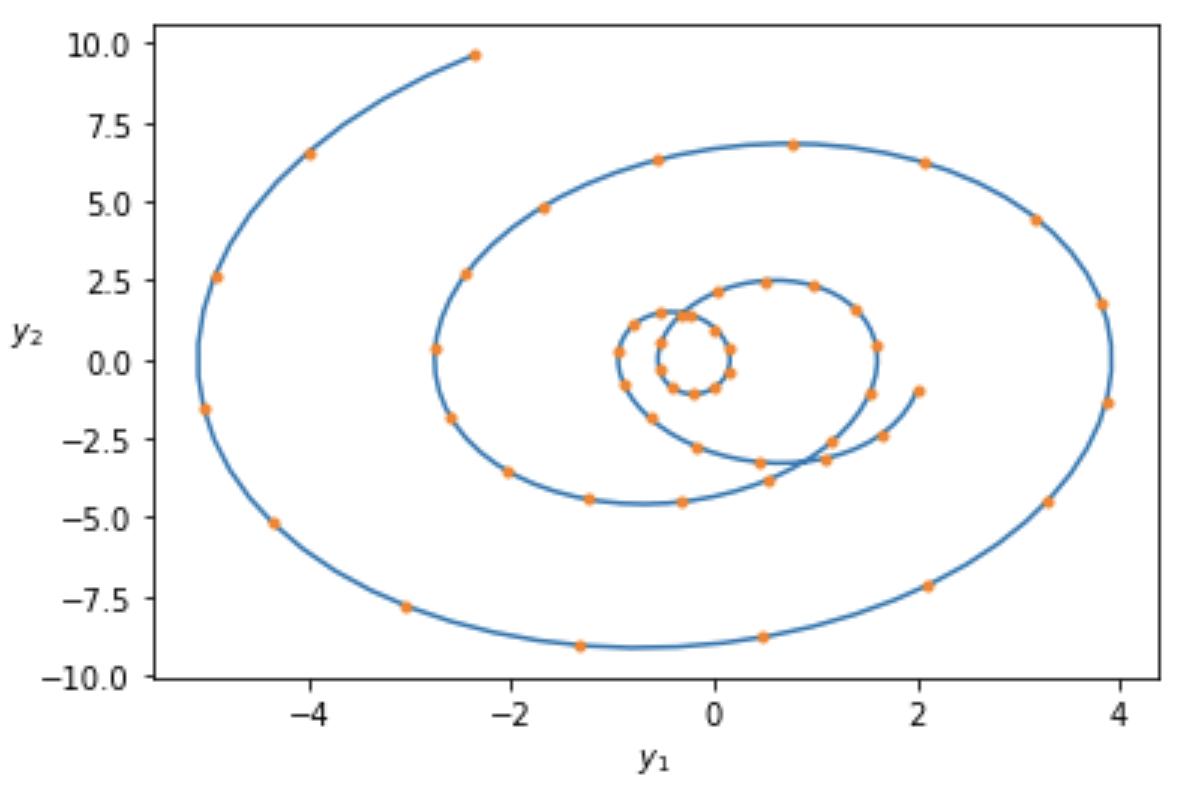


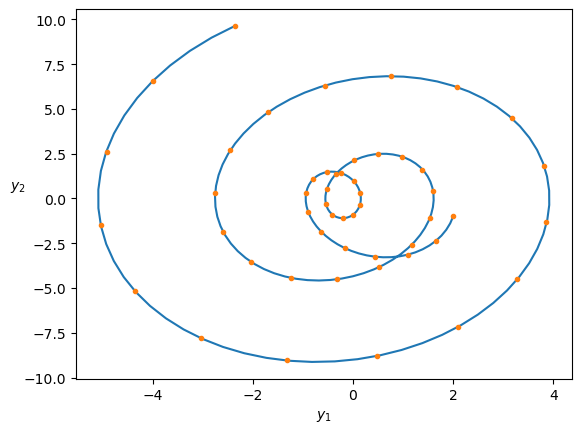

In [13]:
def runge_kutta_system (a,b,n,t0,y0,f):
    h = (b-a)/n
    y = np.zeros((n+1,len(y0)))
    t = t0
    y[0] = y0
    for k in range(0,n):
        f1 = f(t,y[k])
        f2 = f(t+(h/2),y[k]+(h/2)*f1)
        f3 = f(t+(h/2),y[k]+(h/2)*f2)
        f4 = f(t+h,y[k]+h*f3)
        y[k+1] = y[k] + (h/6)*(f1+2*f2+2*f3+f4)
        t = t + h
    return y

def exact(t):
    y1 = 2*np.cos(2*t)-(1/8)*np.sin(2*t)-(3*t/4)*np.cos(2*t)
    y2 = -4*np.sin(2*t)-(1/4)*np.cos(2*t)-(3/4)*np.cos(2*t)+(3*t/2)*np.sin(2*t)
    return np.array([y1,y2])


def fun(t,y):
    A = np.array([[0,1],[-4,0]])
    b = np.array([0,3*np.sin(2*t)])
    return A @ y + b

a = 0
b = 10
n = 50
t_exact = np.linspace(a,b,200)
y_exact= exact(t_exact)
#print(t_exact)
#print(y_exact) #not same as numerical solutions
plt.plot(y_exact[0], y_exact[1])
plt.xlabel('$y_1$')
plt.ylabel('$y_2$', rotation = 0)

y_approx = runge_kutta_system(a, b, n, a, np.array([2,-1]),fun)
#print(y_approx)
plt.plot(y_approx[:,0], y_approx[:,1], '.')

# Part 1b : The Order of Runge-Kutta's Method (2 points)

## Run Runge-Kutta's method on the problem in part 1a with $a = 0$ and $b = 10$ with $n = 1000$ and $n = 2000$.
## Use Python to compute the errors $\| \mathbf{y}_{1000} - \mathbf{y}(b) \|$ and $\| \mathbf{y}_{2000} - \mathbf{y}(b) \|$.
## Answer : The error when n = 1000 is 9.357215616612113e-08 and the error when n = 2000 is 5.828201000305941e-09, very very small. 
## Use the formula 
## $$\displaystyle\frac{\| \mathbf{y}_{n} - \mathbf{y}(b) \|}{\| \mathbf{y}_{2n} - \mathbf{y}(b) \|} \approx \frac{\frac{c}{n^p}}{\frac{c}{(2n)^p}} = 2^p$$
## with $n = 1000$ to deduce the order of Runge-Kutta's method.  Show all work and explain.
## Answer : $$\displaystyle\frac{\| \mathbf{y}_{1000} - \mathbf{y}(b) \|}{\| \mathbf{y}_{2000} - \mathbf{y}(b) \|} = 16.05506676266128 \approx 2^p$$  This means that the power must be 4 since $2^4$ = 16

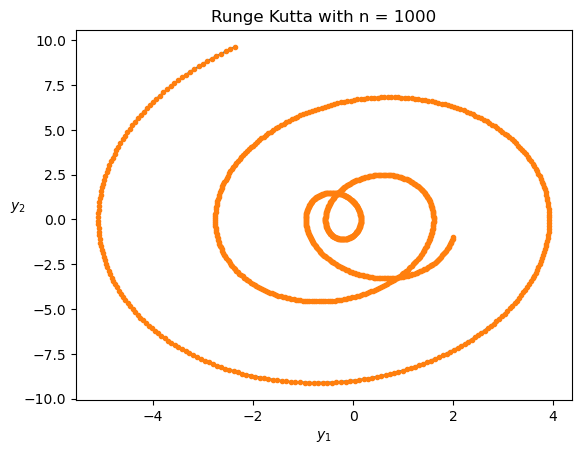

In [32]:
n = 1000
y_approx = runge_kutta_system(a, b, n, a, np.array([2,-1]),fun)
plt.plot(y_exact[0], y_exact[1]);
plt.plot(y_approx[:,0], y_approx[:,1], '.');
plt.plot ( [exact(b)[0],y_approx[n, 0]], [exact(b)[1],y_approx[n,1]], linewidth = 3.0); #attempt to visualize error
plt.xlabel('$y_1$');
plt.ylabel('$y_2$', rotation = 0);
plt.title('Runge Kutta with n = 1000');

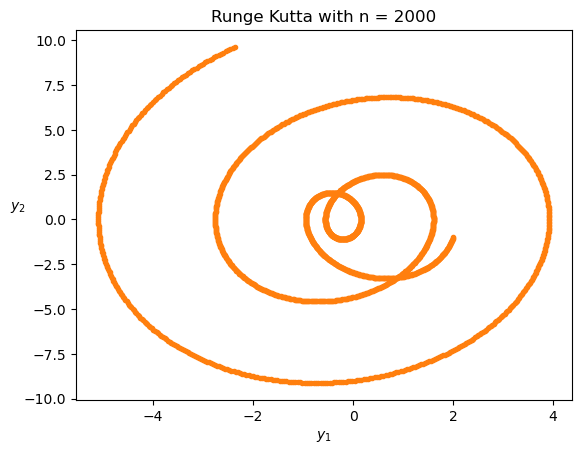

In [34]:
n = 2000
y_approx = runge_kutta_system(a, b, n, a, np.array([2,-1]),fun)
plt.plot(y_exact[0], y_exact[1])
plt.plot(y_approx[:,0], y_approx[:,1], '.')
plt.plot ( [exact(b)[0],y_approx[n, 0]], [exact(b)[1],y_approx[n,1]], linewidth = 3.0); #attempt to visualize error
plt.xlabel('$y_1$')
plt.ylabel('$y_2$', rotation = 0)
plt.title('Runge Kutta with n = 2000');

In [37]:
a = 0
b = 10
n = 1000
y_approx = runge_kutta_system(a, b, n, a, np.array([2,-1]),fun)
error_1000 = np.linalg.norm(y_approx[n] - exact(b)) #b is largest t val and n is last time step
n = 2000
y_approx = runge_kutta_system(a, b, n, a, np.array([2,-1]),fun)
error_2000 = np.linalg.norm(y_approx[n] - exact(b))

print(error_1000, error_2000)
#ratio did it half? quarter ? eigth? sixteenth? 
print(error_1000/error_2000)
# error was reduced by 1/16 when n doubles

9.357215616612113e-08 5.828201000305941e-09
16.05506676266128


# Part 2a : SIR Model Numerical Solution (3 points)
## In lecture 18 we the SIR (Susceptible, Infected, Recovered) model for the spread of an infectious disease. 
## In particular, we considered the nonlinear system
## $$S' = -\beta S I, \qquad I' = \beta SI - \alpha I, \qquad R' = \alpha I$$
## where
## $$\alpha = 1/2, \qquad \beta = 1$$
## with initial conditions
## $$S(0) = 0.99, \qquad I(0) = 0.01, \qquad R(0) = 0$$
## Use **Runge Kutta's method** with $n = 200$ to plot numerical approximations to the solutions $S(t)$, $I(t)$, and $R(t)$ where $t$ goes from $0$ to $50$.  
## See the screenshot below for the correct output.
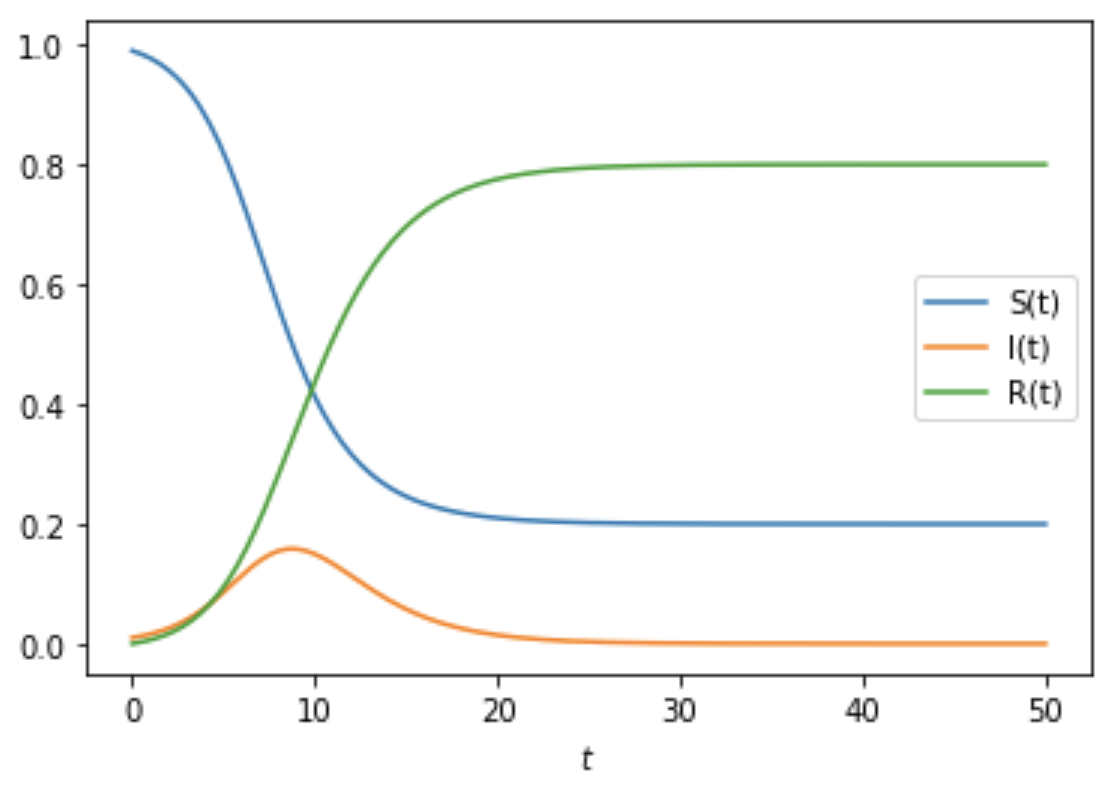

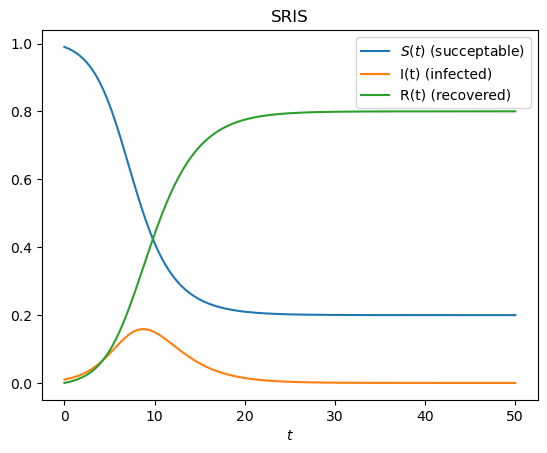

In [10]:
def runge_kutta_system (a,b,n,t0,y0,f):
    h = (b-a)/n
    y = np.zeros((n+1,len(y0)))
    t = t0
    y[0] = y0
    for k in range(0,n):
        f1 = f(t,y[k])
        f2 = f(t+(h/2),y[k]+(h/2)*f1)
        f3 = f(t+(h/2),y[k]+(h/2)*f2)
        f4 = f(t+h,y[k]+h*f3)
        y[k+1] = y[k] + (h/6)*(f1+2*f2+2*f3+f4)
        t = t + h
    return y

def exact(t, y):
    alpha = 0.5
    beta = 1
    s = y[0]
    i = y[1]
    r = y[2]
    f1 = -1*beta*s*i
    f2 = beta*s*i-alpha*i
    f3 = alpha*i
    return np.array([f1,f2,f3])

a = 0 
b = 50
t0 = a 
n = 200
y0 = np.array([0.99, 0.01, 0])
y_approx = runge_kutta_system(a,b,n, t0, y0, exact)
#print(y_approx)
t_approx = np.linspace(a,b,n+1)
plt.plot(t_approx, y_approx[:,0], label='$S(t)$ (succeptable)') # you can add ,'.', after the Y_approx to get raw data points
plt.plot(t_approx, y_approx[:,1], label='I(t) (infected)')
plt.plot(t_approx, y_approx[:,2], label = 'R(t) (recovered)')
plt.legend()
plt.title('SRIS')
plt.xlabel('$t$');



# Part 2b : SIR Model Interpretation (2 points)
## Suppose a new drug is invented that speeds up recovery. 
## What parameter would you change to reflect this change?  
## Answer : I would increase alpha 
## Would the parameter increase or decrease?
## Answer : increase
## What effect do you think this change would have on $I(t)$?
## Answer : $I(t)$ would decrease
## Plot a new numerical solution using Runge-Kutta of $S(t)$, $I(t)$, and $R(t)$ with the modified parameter (increase or decrease your chosen parameter by 0.25) to verify your conjecture.  As before, use $n = 200$ and let $t$ go from $0$ to $50$.

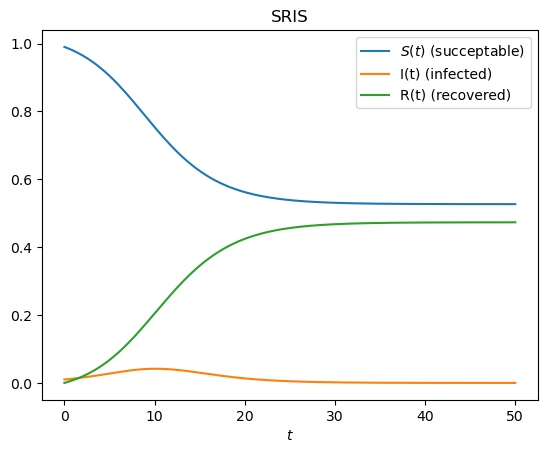

In [11]:
def exact(t, y):
    alpha = 0.75
    beta = 1
    s = y[0]
    i = y[1]
    r = y[2]
    f1 = -1*beta*s*i
    f2 = beta*s*i-alpha*i
    f3 = alpha*i
    return np.array([f1,f2,f3])

a = 0 
b = 50
t0 = a 
n = 200
y0 = np.array([0.99, 0.01, 0])
y_approx = runge_kutta_system(a,b,n, t0, y0, exact)
#print(y_approx)
t_approx = np.linspace(a,b,n+1)
plt.plot(t_approx, y_approx[:,0], label='$S(t)$ (succeptable)') # you can add ,'.', after the Y_approx to get raw data points
plt.plot(t_approx, y_approx[:,1], label='I(t) (infected)')
plt.plot(t_approx, y_approx[:,2], label = 'R(t) (recovered)')
plt.legend()
plt.title('SRIS')
plt.xlabel('$t$');


# Part 3a : Using a Mystery Numerical Method (4 points).  
## Suppose we want to approximate the solution $\boldsymbol{y}(t)$ to the initial value problem 
## $$\boldsymbol{y}' = \boldsymbol{f}(t,\boldsymbol{y}), \qquad \boldsymbol{y}(t_0) = \boldsymbol{y}_0$$
## at the points $t_0, t_1, \ldots, t_n$ where $t_{k+1} = t_k + h$ for some $h > 0$ using the following *Mystery Numerical Method*.
* ## Set $\boldsymbol{y}_0 = \boldsymbol{y}(t_0)$.  
* ## For each $k$ in $0, \ldots, n-1$ calculate 
## $$\qquad \boldsymbol{y}_{k+1} = \boldsymbol{y}_k + h \boldsymbol{f} \left (t_k + \frac{h}{2},  \boldsymbol{y}_k + \frac{h}{2} \boldsymbol{f} (t_k, \boldsymbol{y}_k) \right )$$

## Complete the Python function given below to implement the mystery method.

## Recall the initial value problem from part 1a given by:
## $$x'' + 4x = 3 \sin(2t), \qquad x(0) = 2, \qquad x'(0) = -1$$
## with exact solution
## $$x(t) = 2 \cos (2t) - \frac{1}{8} \sin (2t) - \frac{3t}{4} \cos(2t)$$
## To apply numerical methods we convert to the first order system initial value problem 
## $$\mathbf{y}' = \begin{bmatrix} 0 & 1 \\ -4 & 0 \end{bmatrix}
\mathbf{y} + \begin{bmatrix} 0 \\ 3 \sin (2t) \end{bmatrix},
\qquad \mathbf{y}(0) = \begin{bmatrix} 2 \\ -1 \end{bmatrix}$$
## Use the mystery method with n = 100 to plot an approximate solution where t goes from 0 to 10 on the same plot as the exact solution.
## See the screenshot below for the correct output.
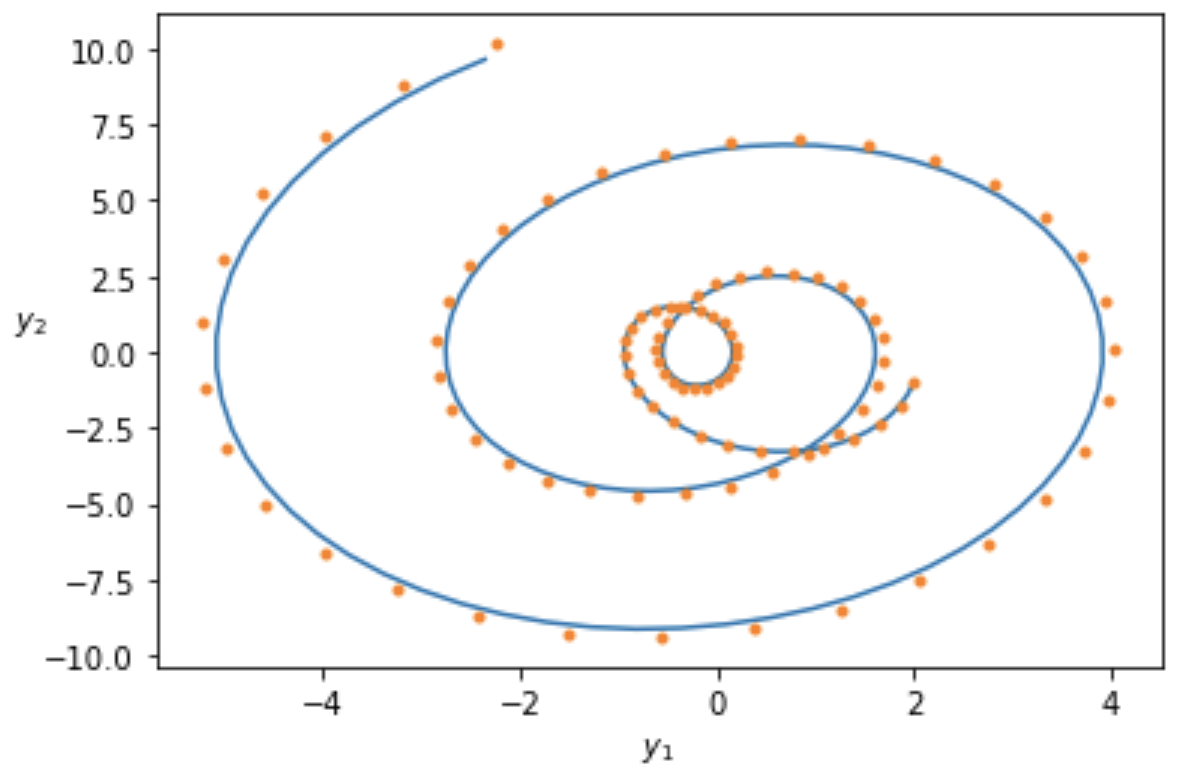

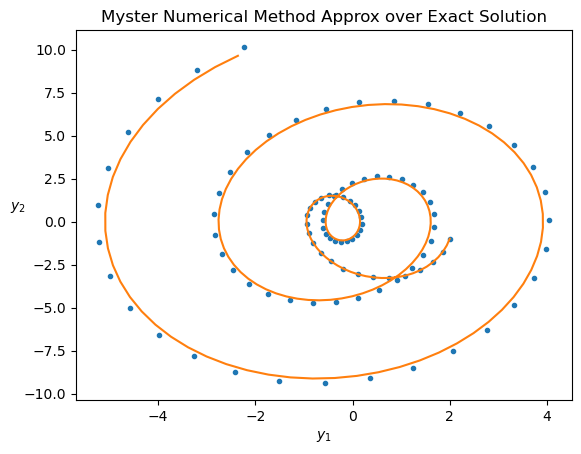

In [44]:
def mystery_system (a,b,n,t0,y0,f):
    h = (b-a)/n
    y = np.zeros((n+1,len(y0)))
    t = t0
    y[0] = y0
    for k in range(0,n):
        f1 = f(t,y[k])
        f2 = f(t + h/2, y[k] + h/2*f1)
        y[k+1] = y[k] + h*f2
        t = t + h
    return y
        
def fun(t,y):
    A = np.array([[0,1],[-4,0]])
    b = np.array([0,3*np.sin(2*t)])
    return A @ y + b

a = 0
b = 10
n = 100

t_exact = np.linspace(a,b,200)
y_exact= exact(t_exact)
y_approx = mystery_system(a, b, n, a, np.array([2,-1]),fun)
#print(y_approx)
plt.plot(y_approx[:,0], y_approx[:,1], '.')
#print(t_exact)
#print(y_exact) #not same as numerical solutions
plt.plot(y_exact[0], y_exact[1])


plt.xlabel('$y_1$')
plt.ylabel('$y_2$', rotation = 0);
plt.title('Myster Numerical Method Approx over Exact Solution');


# Part 3b : The Order of the Mystery Method (2 points)

## Run the Mystery Method on the problem in part 3a with $a = 0$ and $b = 10$ with $n = 1000$ and $n = 2000$.
## Use Python to compute the errors $\| \mathbf{y}_{1000} - \mathbf{y}(b) \|$ and $\| \mathbf{y}_{2000} - \mathbf{y}(b) \|$.
## Answer : The error made when n = 1000 is 0.004980816183829169 and the error made when n = 2000 is 0.0012414181406960004
## Use the formula 
## $$\displaystyle\frac{\| \mathbf{y}_{n} - \mathbf{y}(b) \|}{\| \mathbf{y}_{2n} - \mathbf{y}(b) \|} \approx \frac{\frac{c}{n^p}}{\frac{c}{(2n)^p}} = 2^p$$
## with $n = 1000$ to deduce the order of the Mystery Method.  Show all work and explain.
## Answer : $$\displaystyle\frac{\| \mathbf{y}_{1000} - \mathbf{y}(b) \|}{\| \mathbf{y}_{2000} - \mathbf{y}(b) \|} = 4.012198646490438 \approx 2^p$$ This means that the power must be 2 since $2^2$ = 4

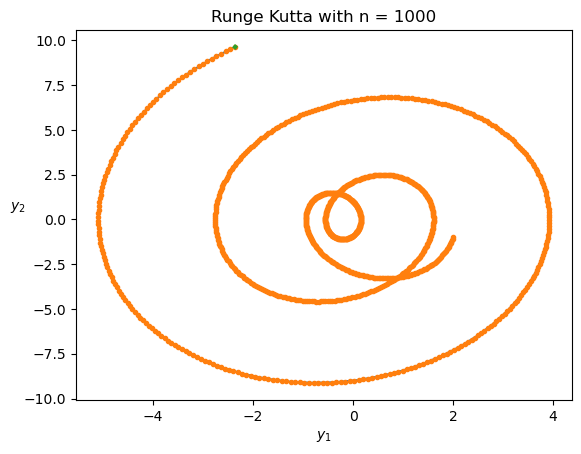

In [45]:
n = 1000
y_approx = mystery_system(a, b, n, a, np.array([2,-1]),fun)
plt.plot(y_exact[0], y_exact[1]);
plt.plot(y_approx[:,0], y_approx[:,1], '.');
plt.plot ( [exact(b)[0],y_approx[n, 0]], [exact(b)[1],y_approx[n,1]], linewidth = 3.0); #attempt to visualize error
plt.xlabel('$y_1$');
plt.ylabel('$y_2$', rotation = 0);
plt.title('Runge Kutta with n = 1000');

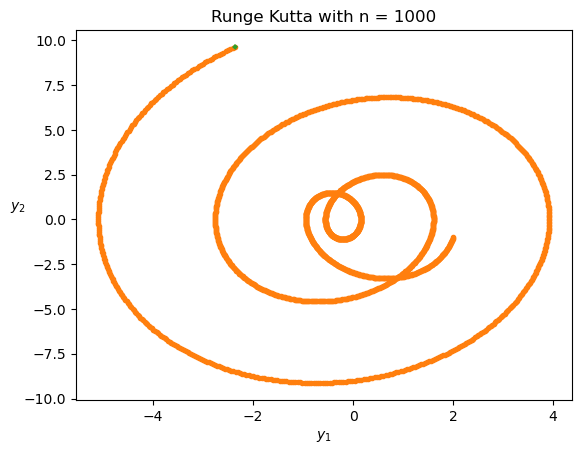

In [46]:
n = 2000
y_approx = mystery_system(a, b, n, a, np.array([2,-1]),fun)
plt.plot(y_exact[0], y_exact[1]);
plt.plot(y_approx[:,0], y_approx[:,1], '.');
plt.plot ( [exact(b)[0],y_approx[n, 0]], [exact(b)[1],y_approx[n,1]], linewidth = 3.0); #attempt to visualize error
plt.xlabel('$y_1$');
plt.ylabel('$y_2$', rotation = 0);
plt.title('Runge Kutta with n = 1000');

In [47]:
n = 1000
y_approx = mystery_system(a, b, n, a, np.array([2,-1]),fun)
error_1000 = np.linalg.norm(y_approx[n] - exact(b)) #b is largest t val and n is last time step
n = 2000
y_approx = mystery_system(a, b, n, a, np.array([2,-1]),fun)
error_2000 = np.linalg.norm(y_approx[n] - exact(b))

print(error_1000, error_2000)
#ratio did it half? quarter ? eigth? sixteenth? 
print(error_1000/error_2000)
# error was reduced by 1/4 when n doubles

0.004980816183829169 0.0012414181406960004
4.012198646490438


# Part 4 : Submitting Your Lab as part of Homework 10
* ## Double check that you answered all the above questions (please answer the questions in the markdown cells) and added and ran all code requested.
* ## Once you are ready to submit select "Print Preview" under the file menu in the Jupyter Notebook window.    
* ## Then select the print preview tab and select "Print" under the file menu of your web browser (probably Chrome).
* ## For the print destination select "Save as PDF" to save your exam as a .pdf file to attach to your homework 10.  